In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/jash')

Drive already mounted at /jash; to attempt to forcibly remount, call drive.mount("/jash", force_remount=True).


In [ ]:
df2 = pd.read_csv('/jash/My Drive/Dark web analysis project/Karate.edgelist')

In [ ]:
df2

,"Node 1 ""Node 2"""
0,9491 7600
1,9491 6359
2,9491 1558
3,9491 9288
4,9491 9475
...,...
705223,9503 9521
705224,9503 9950
705225,9900 9521
705226,9900 9950


In [ ]:
del df
del df2

##Now Visualization

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Karateclub_original_emb.csv to Karateclub_original_emb.csv
Saving Karateclub_our_emb.csv to Karateclub_our_emb.csv


In [ ]:
import io
df_orig = pd.read_csv(io.BytesIO(uploaded['Karateclub_original_emb.csv']))
df_our = pd.read_csv(io.BytesIO(uploaded['Karateclub_our_emb.csv']))

In [ ]:
df_orig = pd.read_csv('Karateclub_original_emb.csv')
df_our = pd.read_csv('Karateclub_our_emb.csv')

In [ ]:
temp = df_orig.iloc[4].to_string().split()
print(temp)
df_orig.head()
len(df_orig)

['Embeddings', '2', '-0.014195', '-0.206891', '0.039293', '0.085593', '0.0952...']


34

In [ ]:
import numpy as np
label = np.zeros((34,1))
nodes = np.zeros((34,4))

In [ ]:
i = 0

for i in range(34):
  temp = df_our.iloc[i].to_string().split()
  label[i] = int(temp[1])
  nodes[i] = (float(temp[2]), float(temp[3]), float(temp[4]), float(temp[5]))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(nodes)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [ ]:
new_lab = kmeans.labels_

In [ ]:
print(label.reshape(-1))
print(new_lab)

[ 1. 34. 33.  3.  2.  4. 32. 24. 14. 30.  6. 28.  9.  8.  7. 11. 26.  5.
 20. 29. 25. 31. 22. 18. 15. 21. 17. 27. 13. 16. 10. 19. 23. 12.]
[0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0]


## NetworkX

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
uploaded = files.upload()

Saving Untitled spreadsheet - Sheet1.csv to Untitled spreadsheet - Sheet1.csv


In [ ]:
df = pd.read_csv('Untitled spreadsheet - Sheet1.csv')

In [ ]:
jash = 1
for jash in range(1, 35):
  G.add_node(jash)

In [ ]:
k = 0
for k in range(78):
  random,temp1,temp2 = df.iloc[k].to_string().split()
  G.add_edge(int(temp1), int(temp2))

In [ ]:
G.number_of_nodes()

34

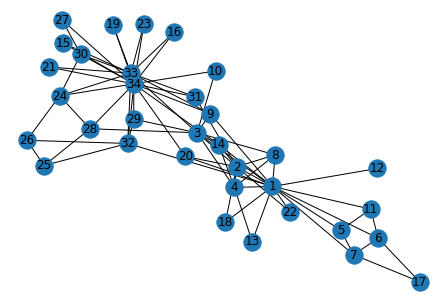

In [ ]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
node_1 = []
node_34 = []

for i in range(34):
  if new_lab[i] == 0:
    node_1.append(label[i])
  else:
    node_34.append(label[i])

print(node_1)
print(node_34)

[array([1.]), array([2.]), array([4.]), array([6.]), array([8.]), array([7.]), array([11.]), array([5.]), array([22.]), array([18.]), array([17.]), array([13.]), array([12.])]
[array([34.]), array([33.]), array([3.]), array([32.]), array([24.]), array([14.]), array([30.]), array([28.]), array([9.]), array([26.]), array([20.]), array([29.]), array([25.]), array([31.]), array([15.]), array([21.]), array([27.]), array([16.]), array([10.]), array([19.]), array([23.])]
